Let us simulate a probability distribution by just taking a random vector and applying softmax to it. We simulate a vocabulary with V = 16 token.

In [1]:
import torch
import matplotlib.pyplot as plt
import collections

In [2]:
torch.manual_seed(123)
V = 16
f = torch.randn(V)
p = torch.softmax(f, dim = 0)
p

tensor([0.0587, 0.0351, 0.0309, 0.0233, 0.0593, 0.0810, 0.0336, 0.0287, 0.0902,
        0.0127, 0.0842, 0.0102, 0.0501, 0.2786, 0.0687, 0.0548])

Let us first perform ordinary sampling and plot the resulting distribution.

In [3]:
def plot_samples(p, trials):
    samples = []
    for i in range(trials):
        idx = torch.distributions.Categorical(probs = p).sample().item()
        samples.append(idx)
    counter = collections.Counter(samples)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(counter.keys(), counter.values())
    plt.show()

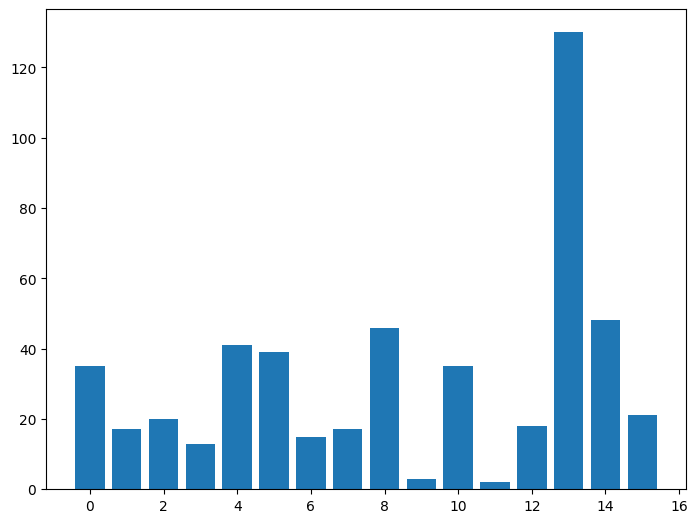

In [4]:
plot_samples(p, trials = 500)

We see a clear peak at index 13, which is the highest index in the probability distribution, which is what we expect. Now let us introduce a *temperature* by which we divide the model output before applying the softmax and see what we get. For a small temperature, we essentially scale all values in the output by a certain factor. As the exponential that appears in the softmax is non-linear, this scaling has a greater impact on the values that are already large, so that we expect the peak to be sharper for a temperature which is greater than one.

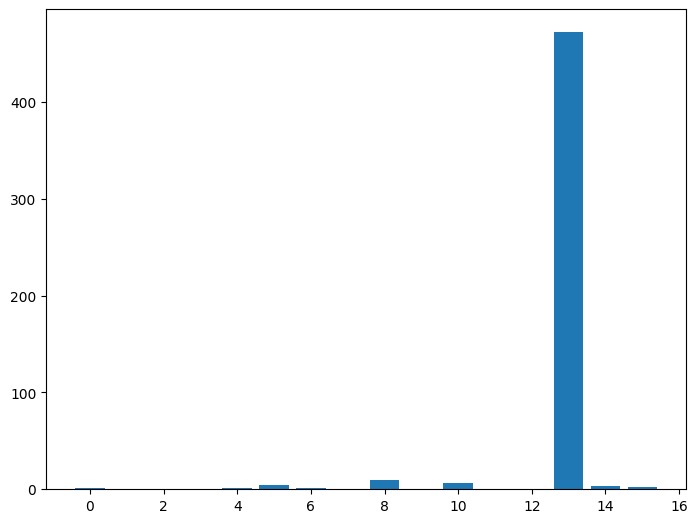

In [5]:
temperature = .3
p = torch.softmax(f / temperature, dim = 0)
plot_samples(p, trials = 500)


For a higher temperature, we should see the exact opposite - the higher the temperature, the more our distribution turns into a uniform distribution, so that all token receive approximately the same temperature.

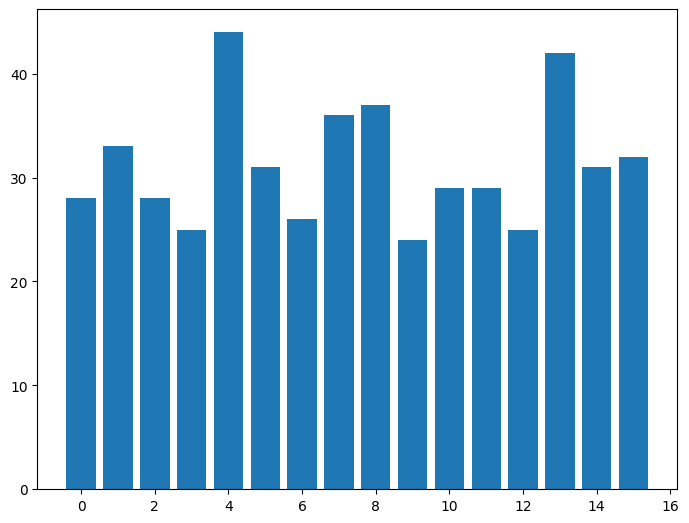

In [6]:
temperature = 10.0
p = torch.softmax(f / temperature, dim = 0)
plot_samples(p, trials = 500)
